In [11]:
import random
from datetime import datetime
import numpy
import pandas


class TimeSeriesDataGenerator:
    """
    Generates time series data based on specified parameters. Please note, this is not a substitute for real data; it is a simplified model for testing purposes.

    Args:
        start_date (str): The start date of the time series data in the format 'YYYY-MM-DD'.
        end_date (str): The end date of the time series data in the format 'YYYY-MM-DD'.
        num_points (int): The number of data points to generate.

    Attributes:
        start_date (datetime): The start date of the time series data.
        end_date (datetime): The end date of the time series data.
        num_points (int): The number of data points to generate.
        data (pandas.Series): The generated time series data.

    Raises:
        ValueError: If the generated data contains infinite or NaN values.

    """

    def __init__(self, start_date, end_date, num_points):
        self.start_date = datetime.strptime(start_date, '%Y-%m-%d')
        self.end_date = datetime.strptime(end_date, '%Y-%m-%d')
        self.num_points = num_points
        self.data = self.generate_data()

    def generate_data(self) -> pandas.Series:
        """
        Generate synthetic time series data.

        This method generates synthetic time series data based on the specified parameters.

        Raises:
            ValueError: If the generated data contains infinite or NaN values.

        Returns:
            pandas.Series: A pandas Series object containing the generated time series data.
        """
        dates = []
        values = []
        delta = (self.end_date - self.start_date) / (self.num_points - 1)
        # Random trend: random value between -1 and 1
        trend = random.uniform(-1, 1)
        # Random seasonality: random period between num_points / 10 and num_points / 2
        seasonality_period = random.uniform(
            self.num_points / 10, self.num_points / 2)
        for i in range(self.num_points):
            date = self.start_date + i * delta
            # Trend: linearly increasing values
            trend_component = trend * i / self.num_points
            # Seasonality: sine wave with a random period
            seasonality_component = numpy.sin(
                2 * numpy.pi * i / seasonality_period)
            # Random noise
            noise = random.uniform(-0.2, 0.2)
            value = trend_component + seasonality_component + noise
            dates.append(date)
            values.append(value)
        # Replace infinite and NaN values with a default value
        values = [value if numpy.isfinite(value) else 0 for value in values]
        if not numpy.all(numpy.isfinite(values)):
            raise ValueError("Generated data contains infinite or NaN values")
        return pandas.Series(values, index=dates)

    def __len__(self):
        return len(self.data)


class GARCHTimeSeriesDataGenerator:
    """
    A class for generating time series data using the GARCH process.

    Parameters:
    - start_date (str): The start date of the time series.
    - mu (float): The mean of the GARCH process. Default is 0.
    - omega (float): The constant term in the GARCH process. Default is 0.1.
    - alpha (list): The list of alpha coefficients in the GARCH process. Default is [0.5].
    - beta (list): The list of beta coefficients in the GARCH process. Default is [0.5].
    """

    def __init__(self, start_date, mu=0, omega=0.1, alpha=[0.5], beta=[0.5]):
        self.start_date = pandas.to_datetime(start_date)
        self.mu = mu
        self.omega = omega
        self.alpha = alpha
        self.beta = beta

    def simulate(self, n) -> pandas.Series:
        """
        Simulates a GARCH process and returns a pandas Series of simulated returns.

            Parameters:
            - n (int): The number of periods to simulate.

            Returns:
            - simulated_series (pandas.Series): A pandas Series of simulated returns.
        """
        # Initialize arrays
        errors = numpy.random.normal(size=n)
        sigmas = numpy.zeros_like(errors)
        returns = numpy.zeros_like(errors)

        # Simulate GARCH process
        for t in range(1, n):
            sigmas[t] = numpy.sqrt(
                self.omega + self.alpha[0] * errors[t-1]**2 + self.beta[0] * sigmas[t-1]**2)
            returns[t] = self.mu + sigmas[t] * errors[t]

        # Create date range
        dates = pandas.date_range(self.start_date, periods=n)

        # Create pandas Series
        simulated_series = pandas.Series(returns, index=dates)

        return simulated_series

In [12]:
og_data = TimeSeriesDataGenerator('2023-01-01', '2023-12-31', 1000).data
time_series_data = og_data
time_series_data

2023-01-01 00:00:00.000000   -0.004063
2023-01-01 08:44:41.081081   -0.108403
2023-01-01 17:29:22.162162    0.197167
2023-01-02 02:14:03.243243   -0.106748
2023-01-02 10:58:44.324324    0.284321
                                ...   
2023-12-29 13:01:15.675595   -0.818629
2023-12-29 21:45:56.756676   -0.796823
2023-12-30 06:30:37.837757   -1.061237
2023-12-30 15:15:18.918838   -0.966894
2023-12-30 23:59:59.999919   -0.918262
Length: 1000, dtype: float64

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf


class TimeSeriesVisualizer:
    """
    A class for visualizing time series data.

    Methods:
    - scatter_plot: Creates a scatter plot of the time series data.
    - line_plot: Creates a line plot of the time series data with rolling and expanding window functions.
    - histogram_plot: Creates a histogram plot of the time series data.
    - area_plot: Creates an area plot of the time series data.
    - box_plot: Creates a box plot of the time series data.
    - lag_plot: Creates a lag plot of the time series data.
    - autocorrelation_plot: Creates an autocorrelation plot of the time series data.
    - partial_autocorrelation_plot: Creates a partial autocorrelation plot of the time series data.
    - visualize_all: Calls all the visualization methods to create all the plots.

    Attributes:
    - time_series: The time series data to be visualized.
    """

    def __init__(self, time_series):
        self.time_series = time_series
        # Set the style of the plots to a professional one
        sns.set_style("whitegrid")
        # Set a consistend color palette
        sns_color_palette = sns.color_palette("bright", as_cmap=True)
        # Set a consistent color palette
        sns.set_palette(sns_color_palette)

    def scatter_plot(self):
        """
        Plots a scatter plot of the time series data.

            Returns:
                None
        """
        plt.figure(figsize=(10, 6))  # Set figure size
        df = self.time_series.reset_index()
        df.columns = ['date', 'value']
        sns.scatterplot(x='date', y='value', data=df)
        plt.title("Scatter Plot of Times Series Data")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.show()

    def line_plot(self, window_size=7, function='mean'):
        """
        Plots a line graph of the time series data.

            Parameters:
            - window_size (int): The size of the rolling window for the rolling function. Default is 7.
            - function (str): The function to apply to the rolling and expanding windows. Supported functions are 'mean' and 'sum'. Default is 'mean'.
        """

        plt.figure(figsize=(10, 6))  # Set figure size
        df = self.time_series.reset_index()
        df.columns = ['date', 'value']
        sns.lineplot(x='date', y='value', data=df, label="Original Series")

        # Apply rolling window function
        if function == 'mean':
            df['rolling'] = df['value'].rolling(window_size).mean()
        elif function == 'sum':
            df['rolling'] = df['value'].rolling(window_size).sum()
        else:
            raise ValueError(
                f"Unsupported function: {function}. Supported functions are 'mean' and 'sum'.")
        sns.lineplot(x='date', y='rolling', data=df,
                     label=f'Rolling {function} (window={window_size})')

        # Apply expanding window function
        # Note: expanding() does not take a window size
        if function == 'mean':
            df['expanding'] = df['value'].expanding().mean()
        elif function == 'sum':
            df['expanding'] = df['value'].expanding().sum()
        else:
            raise ValueError(
                f"Unsupported function: {function}. Supported functions are 'mean' and 'sum'.")
        sns.lineplot(x='date', y='expanding', data=df,
                     label=f'Expanding {function}')

        sns.lineplot(x='date', y='rolling', data=df,
                     label=f'Rolling {function} (window={window_size})')
        plt.title("Line Plot of Times Series Data")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.legend(bbox_to_anchor=(1.1, 1.05), title='Legend')
        plt.show()

    def histogram_plot(self):
        """
        Plot a histogram of the time series data.

        This method generates a histogram plot of the time series data using seaborn library.

        Parameters:
            None

        Returns:
            None
        """
        plt.figure(figsize=(10, 6))  # Set figure size
        sns.histplot(data=self.time_series)
        plt.title(f"Histogram Plot of Times Series Data")
        plt.xlabel("Date")
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.show()

    def area_plot(self):
        """
        Plot an area plot of the time series data.

        This method creates an area plot using the time series data. It fills the area between the index and the values of the time series.

        Parameters:
        None

        Returns:
        None
        """
        plt.figure(figsize=(10, 6))
        if not hasattr(self.time_series, 'index'):
            self.time_series.index = pandas.RangeIndex(
                start=0, stop=len(self.time_series))
        plt.figure(figsize=(10, 6))
        plt.fill_between(self.time_series.index, self.time_series.values)
        plt.title("Area Plot of Time Series Data")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.show()

    def box_plot(self):
        """
        Plot a box plot of the time series data.

        This method creates a box plot of the time series data using the seaborn library.

        Parameters:
        None

        Returns:
        None
        """
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=self.time_series)
        plt.title("Box Plot of Time Series Data")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.show()

    def lag_plot(self, lag_time=1):
        """
        Plot a lag plot of the time series data.

        This method creates a lag plot of the time series data using the pandas lag_plot method.

        Parameters:
        - lag_time (int): The lag time to use for the lag plot. Default is 1.

        Returns:
        None
        """
        plt.figure(figsize=(10, 6))
        lag_plot(self.time_series, lag=lag_time)
        plt.title(f"Lag Plot of Time Series Data: Lag Time of {lag_time}")
        plt.show()

    def autocorrelation_plot(self):
        """
        Plot an autocorrelation plot of the time series data.

        This method creates an autocorrelation plot of the time series data using the pandas autocorrelation_plot method.

        Parameters:
        None

        Returns:
        None
        """
        plt.figure(figsize=(10, 6))
        autocorrelation_plot(self.time_series)
        plt.title("Autocorrelation Plot of Time Series Data")

        # Calculate autocorrelation values starting from lag 1
        self._autocorr_values = [self.time_series.autocorr(
            lag=lag) for lag in range(1, len(self.time_series))]

        # Find highest and lowest autocorrelation values and their respective lag intervals
        max_autocorr = max(self._autocorr_values)
        min_autocorr = min(self._autocorr_values)
        # Add 1 because we started from lag 1
        max_lag = self._autocorr_values.index(max_autocorr) + 1
        # Add 1 because we started from lag 1
        min_lag = self._autocorr_values.index(min_autocorr) + 1

        # Add vertical lines to indicate lags with highest and lowest autocorrelation values
        plt.axvline(x=max_lag, color='r', linestyle='--')
        plt.axvline(x=min_lag, color='b', linestyle='--')

        # Display highest and lowest autocorrelation values in the legend
        plt.legend([f'Max: {max_autocorr:.2f} (Lag: {max_lag})', f'Min: {min_autocorr:.2f} (Lag: {min_lag})'],
                   title='Autocorrelation values', loc='upper right')

        plt.show()

    def partial_autocorrelation_plot(self):
        """
        Plot a partial autocorrelation plot of the time series data.

        This method creates a partial autocorrelation plot of the time series data using the statsmodels plot_pacf method.

        Parameters:
        None

        Returns:
        None
        """
        plt.figure(figsize=(10, 6))
        plot_pacf(self.time_series, lags=len(self.time_series) * .49)
        plt.title("Partial Autocorrelation Plot of Time Series Data")
        plt.show()

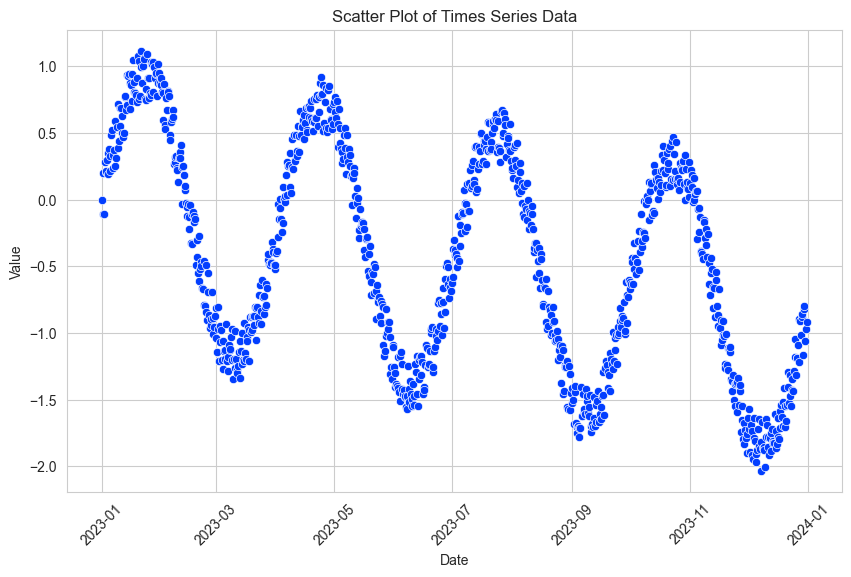

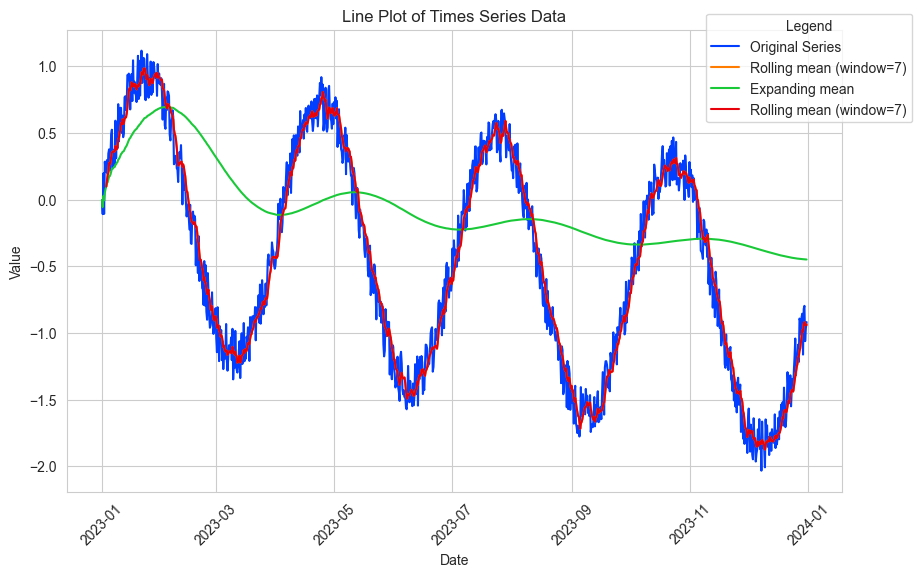

<Figure size 1000x600 with 0 Axes>

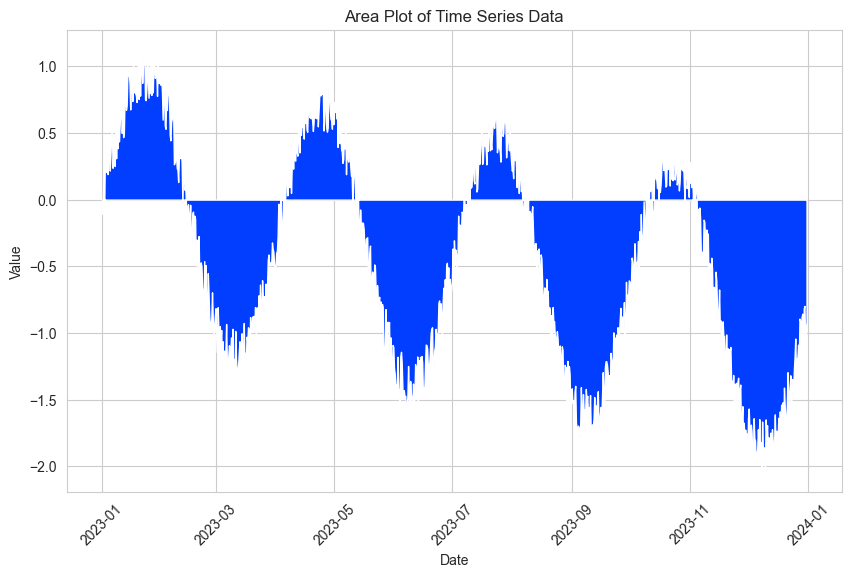

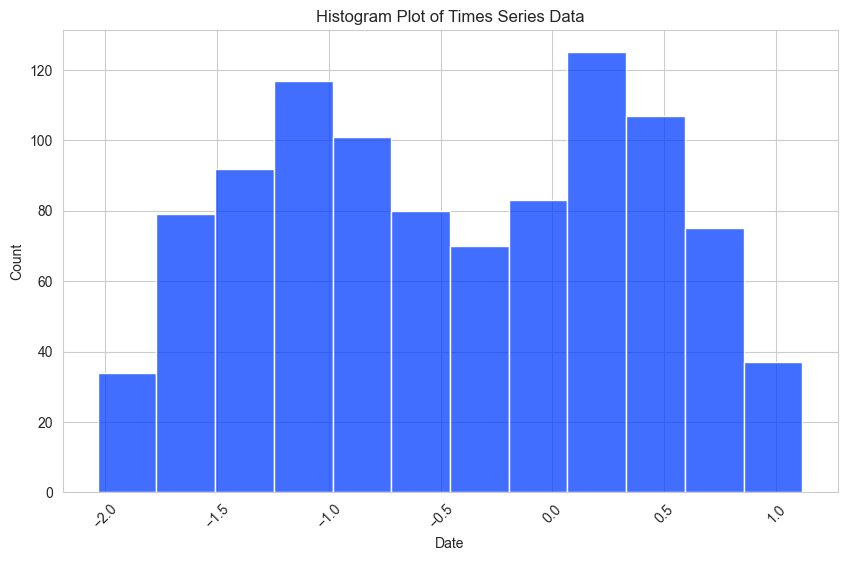

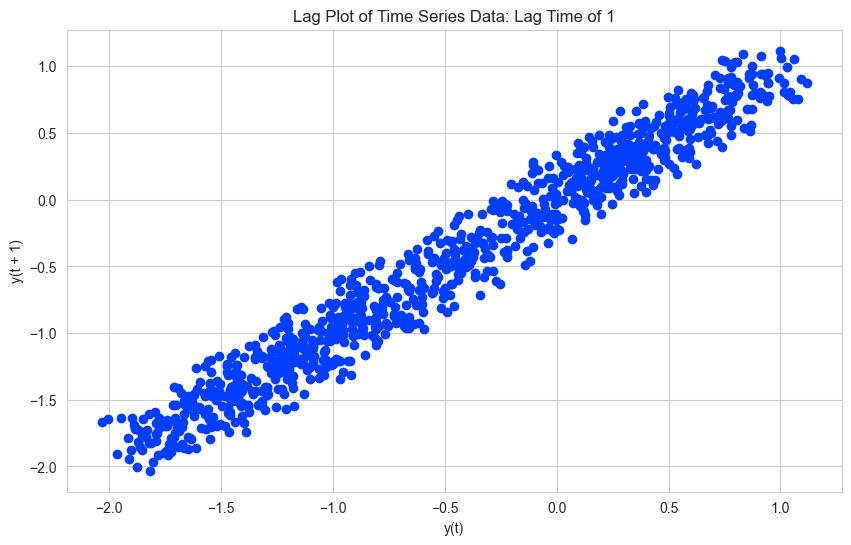

C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


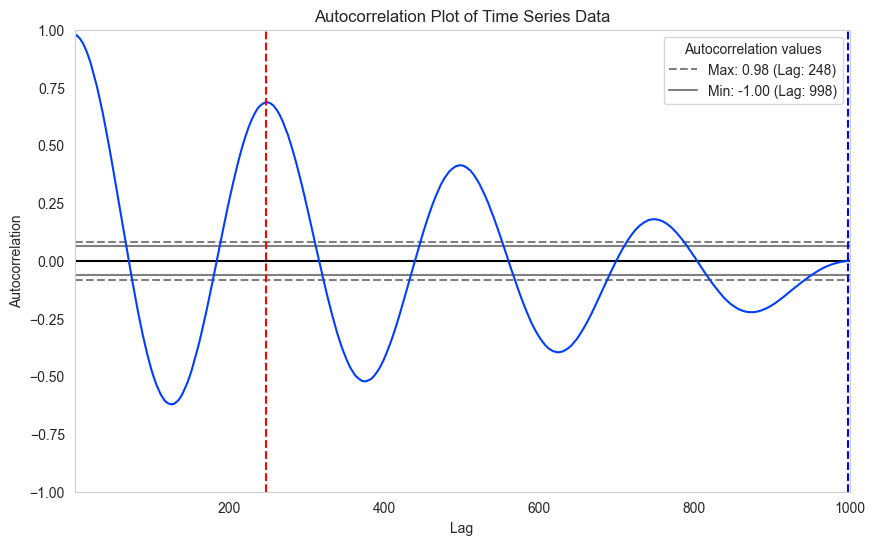

<Figure size 1000x600 with 0 Axes>

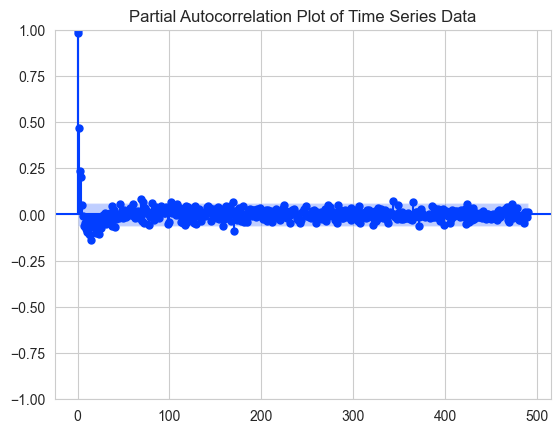

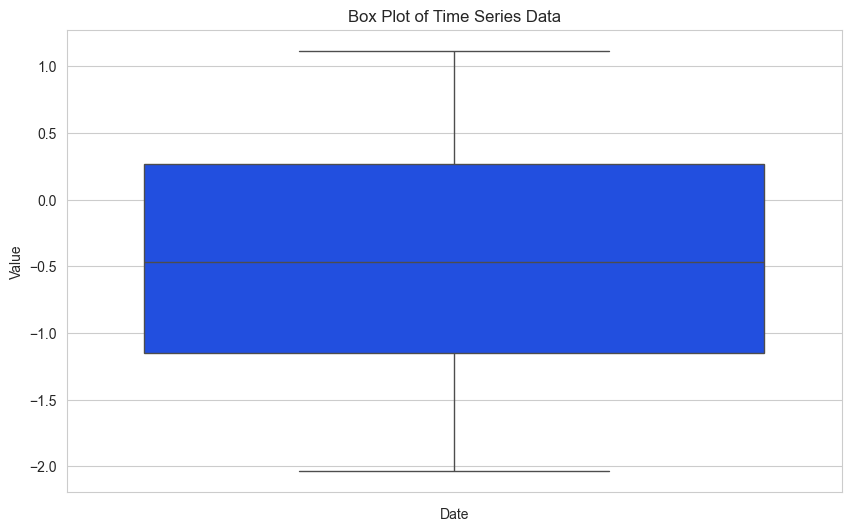

In [23]:
time_series_visualizer = TimeSeriesVisualizer(time_series_data)
time_series_visualizer.scatter_plot()
time_series_visualizer.line_plot()
time_series_visualizer.area_plot()
time_series_visualizer.histogram_plot()
time_series_visualizer.lag_plot()
time_series_visualizer.autocorrelation_plot()
time_series_visualizer.partial_autocorrelation_plot()
time_series_visualizer.box_plot()

In [5]:
from statsmodels.tsa.stattools import adfuller
import numpy as np


class StationarityTester:
    """StationarityTester class

    This class is used to test the stationarity of a time series and transform it to a stationary series.

    Args:
        time_series_generator (TimeSeriesGenerator): A TimeSeriesGenerator object to be tested for stationarity.
    """

    def __init__(self, time_series_generator):
        self.time_series = time_series_generator
        if not np.all(np.isfinite(self.time_series)):
            raise ValueError("Time series contains NaN or Inf values")

    def test_stationarity(self, timeseries, confidence_level=0.05):
        """Tests stationarity of a time series using the Dickey-Fuller test.

        Args:
            timeseries (array-like): The time series to be tested for stationarity.
            confidence_level (float, optional): The confidence level to use when testing for stationarity. Defaults to 0.05.

        Returns:
            float: The p-value of the Dickey-Fuller test.
        """
        # Perform Dickey-Fuller test:
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pandas.Series(dftest[0:4], index=[
                                 'Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput['Critical Value (%s)' % key] = value
        print(dfoutput)

        p_value = dfoutput['p-value']
        if p_value < confidence_level:
            print(
                f"--Your data is stationary, as the p-value ({p_value}) is less than your specified confidence level ({confidence_level}).")
        else:
            print(
                f"--Your data is not stationary, as the p-value ({p_value}) is greater than your specified confidence level ({confidence_level}).")

        return dfoutput['p-value']

    def make_stationary(self):
        """Transforms the time series into a stationary series.
        """
        print("---- Original Series Stationarity Test ----")
        p_value_original = self.test_stationarity(self.time_series)
        print(f"--Original series p-value: {p_value_original}")
        print("\n")

        # Shift the series to handle zero or negative values
        shift = abs(min(self.time_series)) + 1e-10
        adjusted_series = self.time_series + shift

        # Apply log transformation
        log_transformed = np.log(adjusted_series)
        print("---- Log Transformation Stationarity Test ----")
        p_value_log = self.test_stationarity(log_transformed)
        print(f"-- Log transformed series p-value: {p_value_log}")
        print("\nd")

        # Apply square root transformation
        sqrt_transformed = np.sqrt(adjusted_series)
        print("---- Square Root Transformation Stationarity Test ----")
        p_value_sqrt = self.test_stationarity(sqrt_transformed)
        print(f"-- Square root transformed series p-value: {p_value_sqrt}")
        print("\n")

        # Compare p-values and return the most stationary series
        if min(p_value_original, p_value_log, p_value_sqrt) == p_value_log:
            print("Log transformation resulted in the most stationary series. Returning the log transformed series.")
            log_transformed._transformed_series_type = 'log'
            return log_transformed
        elif min(p_value_original, p_value_log, p_value_sqrt) == p_value_sqrt:
            print("Square root transformation resulted in the most stationary series. Returning the square root transformed series.")
            sqrt_transformed._transformed_series_type = 'sqrt'
            return sqrt_transformed
        else:
            print("The original series is the most stationary.")
            self.time_series._transformed_series_type = 'original'
            return self.time_series

In [6]:
stationarity_tester = StationarityTester(time_series_data)
stationary_series = stationarity_tester.make_stationary()
print(f"\nSeries transformation type: {stationary_series._transformed_series_type}")

---- Original Series Stationarity Test ----
Results of Dickey-Fuller Test:
Test Statistic                -1.224723e+01
p-value                        9.721313e-23
#Lags Used                     2.200000e+01
Number of Observations Used    9.770000e+02
Critical Value (1%)           -3.437061e+00
Critical Value (5%)           -2.864503e+00
Critical Value (10%)          -2.568348e+00
dtype: float64
--Your data is stationary, as the p-value (9.721312740941223e-23) is less than your specified confidence level (0.05).
--Original series p-value: 9.721312740941223e-23


---- Log Transformation Stationarity Test ----
Results of Dickey-Fuller Test:
Test Statistic                  -4.299214
p-value                          0.000446
#Lags Used                       7.000000
Number of Observations Used    992.000000
Critical Value (1%)             -3.436959
Critical Value (5%)             -2.864458
Critical Value (10%)            -2.568324
dtype: float64
--Your data is stationary, as the p-value (0.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# statistical models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter
from statsmodels.tsa.statespace.structural import UnobservedComponents
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import STL
from arch import arch_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor




class TimeSeriesModel:
    def __init__(self, time_series_data):
        self.time_series_data = time_series_data
        self.train_data = time_series_data[:int(0.8*len(time_series_data))]
        self.test_data = time_series_data[int(0.8*len(time_series_data)):]
        self.exog = None # change this to account for any exogenous variables
        

    def arima(self, p=1, d=1, q=1):
        model = ARIMA(self.train_data, order=(p,d,q))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(self.test_data))
        mse = mean_squared_error(self.test_data, forecast)
        rmse = np.sqrt(mse)
        plt.figure(figsize=(10, 6))  # Set figure size
        plt.title(f"ARIMA Forecast Model of Times Series Data")
        plt.plot(self.time_series_data, label='Original Data')
        plt.plot(forecast, label='ARIMA Forecast')
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.legend(bbox_to_anchor=(1.1, 1.05), title = 'Legend')
        plt.show()
        return ('ARIMA', forecast, rmse)
    
    def sarimax(self, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0)):
        model = SARIMAX(self.train_data, order=order, seasonal_order=seasonal_order, exog=self.exog)
        model_fit = model.fit(disp=False)
        forecast = model_fit.forecast(steps=len(self.test_data))
        mse = mean_squared_error(self.test_data, forecast)
        rmse = np.sqrt(mse)
        plt.figure(figsize=(10, 6))  # Set figure size
        plt.title(f"SARIMAX Forecast Model of Times Series Data")
        plt.plot(self.time_series_data, label='Original Data')
        plt.plot(forecast, label='SARIMAX Forecast')
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.legend(bbox_to_anchor=(1.1, 1.05), title = 'Legend')
        plt.show()
        return ('SARIMAX', forecast, rmse)


    def holt_winters(self, trend='add', seasonal='add', seasonal_periods=12):
        model = ExponentialSmoothing(self.train_data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(self.test_data))
        mse = mean_squared_error(self.test_data, forecast)
        rmse = np.sqrt(mse)
        plt.figure(figsize=(10, 6))  # Set figure size
        plt.title(f"Holt-Winters Forecast Model of Times Series Data")
        plt.plot(self.time_series_data, label='Original Data')
        plt.plot(forecast, label='Holt-Winters Forecast')
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.legend(bbox_to_anchor=(1.1, 1.05), title = 'Legend')
        plt.show()
        return ('Holt-Winters', forecast, rmse)
    
    def stl(self, period=12):
        stl = STL(self.time_series_data, period=period)
        res = stl.fit()
        decomp = pd.DataFrame({
        'trend': res.trend,
        'seasonal': res.seasonal,
        'resid': res.resid
        })
        trend_model = ARIMA(decomp['trend'].dropna(), order=(1, 1, 1))
        trend_model_fit = trend_model.fit()
        trend_forecast = trend_model_fit.forecast(steps=len(self.test_data))
        seasonal_model = ARIMA(decomp['seasonal'].dropna(), order=(1, 1, 1))
        seasonal_model_fit = seasonal_model.fit()
        seasonal_forecast = seasonal_model_fit.forecast(steps=len(self.test_data))
        forecast = trend_forecast + seasonal_forecast
        mse = mean_squared_error(self.test_data, forecast)
        rmse = np.sqrt(mse)
        plt.figure(figsize=(10, 6))  # Set figure size
        plt.title(f"STL + ARIMA Forecast Model of Times Series Data")
        plt.plot(self.time_series_data, label='Original Data')
        plt.plot(forecast, label='STL + ARIMA Forecast')
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.legend(bbox_to_anchor=(1.1, 1.05), title = 'Legend')
        plt.show()
        return ('STL + ARIMA', forecast, rmse)
    
    def garch(self, p=1, q=1):
        model = arch_model(self.time_series_data, vol='GARCH', p=p, q=q)
        model_fit = model.fit()
        forecast = model_fit.forecast(horizon=len(self.test_data))
        forecast = forecast.variance.values[-1, :]
        forecast = np.sqrt(forecast)
        mse = mean_squared_error(self.test_data, forecast)
        rmse = np.sqrt(mse)
        plt.figure(figsize=(10, 6))  # Set figure size
        plt.title(f"GARCH Forecast Model of Times Series Data")
        plt.plot(self.time_series_data, label='Original Data')
        plt.plot(forecast, label='GARCH Forecast')
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.legend(bbox_to_anchor=(1.1, 1.05), title = 'Legend')
        plt.show()
        return ('GARCH', forecast, rmse)
    
    def kalman_filter(self):
        kf = KalmanFilter(k_endog=1, k_states=1)
        kf.initialize_approximate_diffuse()
        measurements = np.asarray(self.train_data).reshape(-1, 1)
        kf.bind(measurements)
        filter_results = kf.filter()
        forecast = filter_results.filtered_state[-1]
        if len(forecast) > len(self.test_data):
            forecast = forecast[:len(self.test_data)]
        elif len(forecast) < len(self.test_data):
            forecast = np.concatenate((forecast, [forecast[-1]] * (len(self.test_data) - len(forecast))))
        mse = mean_squared_error(self.test_data, forecast)
        rmse = np.sqrt(mse)
        plt.figure(figsize=(10, 6))  # Set figure size
        plt.title(f"Kalman Filter Forecast Model of Times Series Data")
        plt.plot(self.time_series_data, label='Original Data')
        plt.plot(forecast, label='Kalman Filter Forecast')
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.legend(bbox_to_anchor=(1.1, 1.05), title = 'Legend')
        plt.show()
        return ('Kalman Filter', forecast, rmse)
    
    def unobserved_components(self):
        uc = UnobservedComponents(self.time_series_data, 'local level')
        uc_fit = uc.fit()
        forecast = uc_fit.forecast(steps=len(self.test_data))
        mse = mean_squared_error(self.test_data, forecast)
        rmse = np.sqrt(mse)
        plt.figure(figsize=(10, 6))  # Set figure size
        plt.title(f"Unobserved Components Forecast Model of Times Series Data")
        plt.plot(self.time_series_data, label='Original Data')
        plt.plot(forecast, label='Unobserved Components Forecast')
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.legend(bbox_to_anchor=(1.1, 1.05), title = 'Legend')
        plt.show()
        return ('Unobserved Components', forecast, rmse)
    
    def random_forest_regressor(self, n_estimators=100):
        model = RandomForestRegressor(n_estimators=n_estimators)
        model.fit(np.arange(len(self.train_data)).reshape(-1, 1), self.train_data.values.reshape(-1, 1))
        forecast = model.predict(np.arange(len(self.train_data), len(self.time_series_data)).reshape(-1, 1))
        mse = mean_squared_error(self.test_data, forecast)
        rmse = np.sqrt(mse)
        plt.figure(figsize=(10, 6))  # Set figure size
        plt.title(f"Random Forest Regressor Forecast Model of Times Series Data")
        plt.plot(self.time_series_data, label='Original Data')
        plt.plot(range(len(self.train_data), len(self.time_series_data)), forecast, label='Random Forest Regressor Forecast')
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.legend(bbox_to_anchor=(1.1, 1.05), title = 'Legend')
        plt.show()
        return ('Random Forest Regressor', forecast, rmse)
        
    
    def gradient_boosting_regressor(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0, loss='ls'):
        model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=random_state, loss=loss)
        model.fit(np.arange(len(self.train_data)).reshape(-1, 1), self.train_data)
        forecast = model.predict(np.arange(len(self.train_data), len(self.time_series_data)).reshape(-1, 1))
        mse = mean_squared_error(self.test_data, forecast)
        rmse = np.sqrt(mse)
        plt.figure(figsize=(10, 6))  # Set figure size
        plt.plot(self.time_series_data, label='Original Data')
        plt.title(f"Gradient Boosting Regressor Forecast Model of Times Series Data")
        plt.plot(range(len(self.train_data), len(self.time_series_data)), forecast, label='Gradient Boosting Regressor Forecast')
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.legend(bbox_to_anchor=(1.1, 1.05), title = 'Legend')
        plt.show()
        return ('Gradient Boosting Regressor', forecast, rmse)
    
    def xgboost_regressor(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
        model.fit(np.arange(len(self.train_data)).reshape(-1, 1), self.train_data)
        forecast = model.predict(np.arange(len(self.train_data), len(self.time_series_data)).reshape(-1, 1))
        mse = mean_squared_error(self.test_data, forecast)
        rmse = np.sqrt(mse)
        plt.figure(figsize=(10, 6))  # Set figure size
        plt.title(f"XGBoost Regressor Forecast Model of Times Series Data")
        plt.plot(self.time_series_data, label='Original Data')
        plt.plot(range(len(self.train_data), len(self.time_series_data)), forecast, label='XGBoost Regressor Forecast')
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.legend(bbox_to_anchor=(1.1, 1.05), title = 'Legend')
        plt.show()
        return ('XGBoost Regressor', forecast, rmse)
    
    def lightgbm_regressor(self, n_estimators=100, learning_rate=0.1, max_depth=-1):
        model = LGBMRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
        model.fit(np.arange(len(self.train_data)).reshape(-1, 1), self.train_data)
        forecast = model.predict(np.arange(len(self.train_data), len(self.time_series_data)).reshape(-1, 1))
        mse = mean_squared_error(self.test_data, forecast)
        rmse = np.sqrt(mse)
        plt.figure(figsize=(10, 6))  # Set figure size
        plt.title(f"LightGBM Regressor Forecast Model of Times Series Data")
        plt.plot(self.time_series_data, label='Original Data')
        plt.plot(range(len(self.train_data), len(self.time_series_data)), forecast, label='LightGBM Regressor Forecast')
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.legend(bbox_to_anchor=(1.1, 1.05), title = 'Legend')
        plt.show()
        return ('LightGBM Regressor', forecast, rmse)
    
    def compare_models(self):
        models = [self.arima(), self.sarimax(), self.holt_winters(), self.stl(), self.garch(), self.kalman_filter(), self.unobserved_components(), self.random_forest_regressor(), self.xgboost_regressor(), self.lightgbm_regressor()]
        best_model = min(models, key=lambda x: x[2])
        print(f"Best performing model: {best_model[0]}")
        print(f"RMSE: {best_model[2]}")
        return best_model


C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 31481081081U will be used.
  self._init_dates(dates, freq)
C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 31481081081U will be used.
  self._init_dates(dates, freq)
C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 31481081081U will be used.
  self._init_dates(dates, freq)


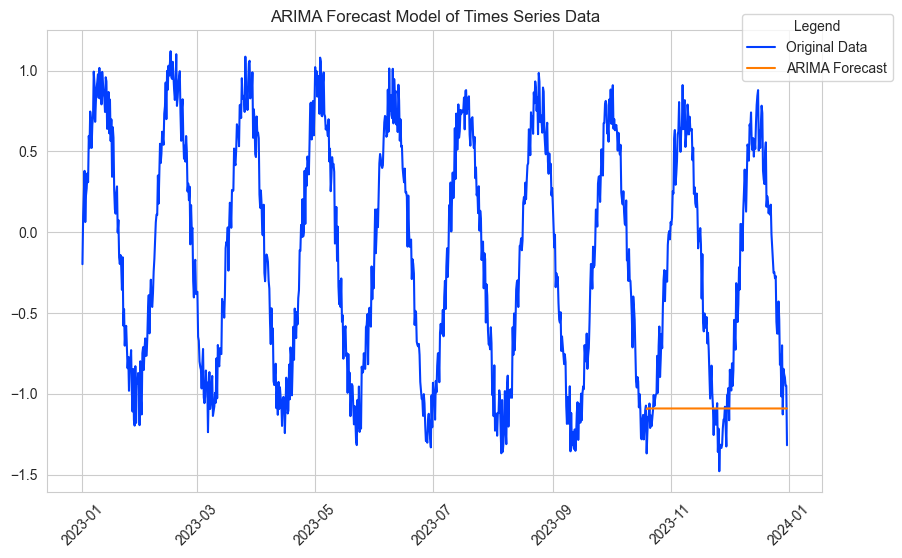

C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 31481081081U will be used.
  self._init_dates(dates, freq)
C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 31481081081U will be used.
  self._init_dates(dates, freq)


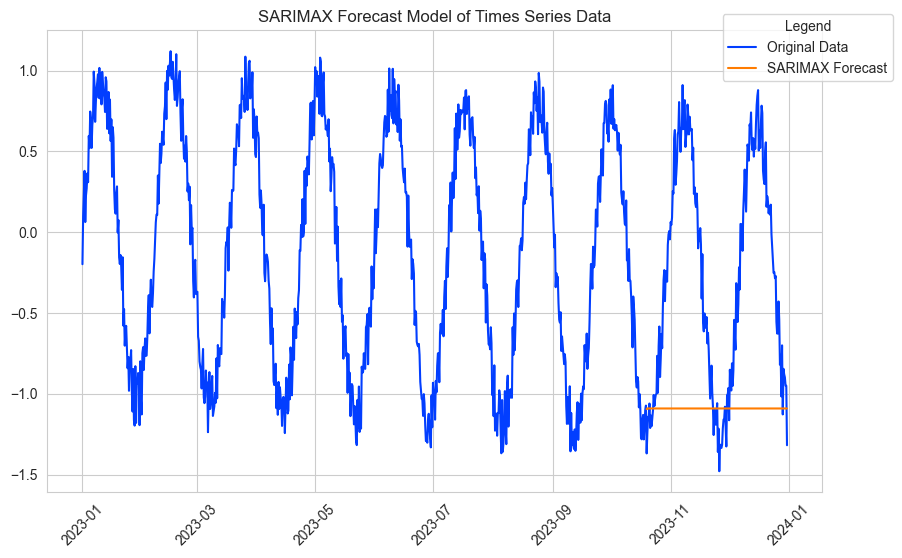

C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 31481081081U will be used.
  self._init_dates(dates, freq)


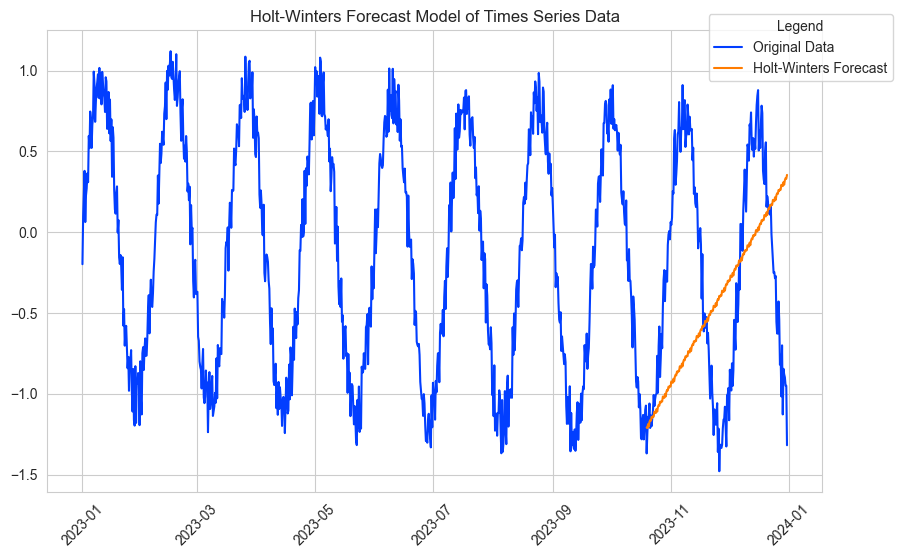

C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 31481081081U will be used.
  self._init_dates(dates, freq)
C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 31481081081U will be used.
  self._init_dates(dates, freq)
C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 31481081081U will be used.
  self._init_dates(dates, freq)
C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.P

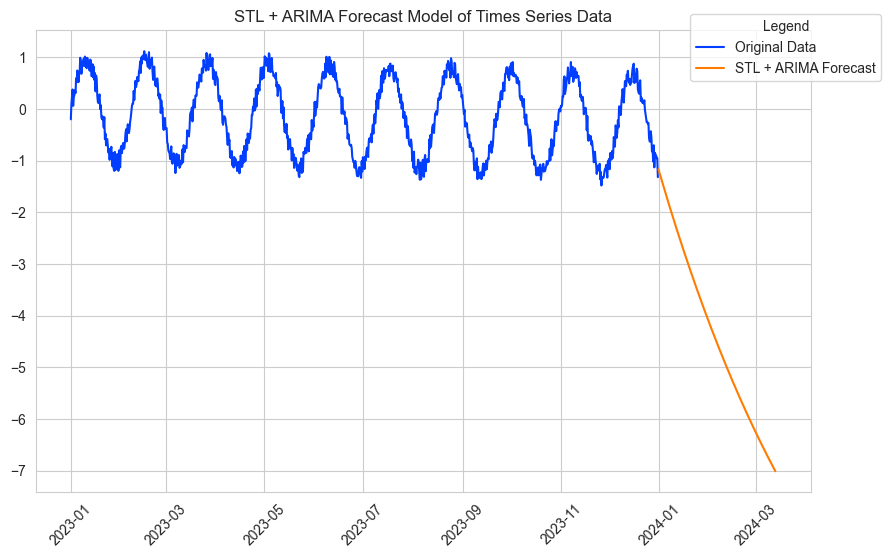

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1366350384900.8623
Iteration:      2,   Func. Count:     13,   Neg. LLF: 66408.84520085479
Iteration:      3,   Func. Count:     19,   Neg. LLF: 6407.779285857118
Iteration:      4,   Func. Count:     27,   Neg. LLF: 26473156907.676144
Iteration:      5,   Func. Count:     34,   Neg. LLF: 898.7002012885223
Iteration:      6,   Func. Count:     39,   Neg. LLF: 1586.703952434856
Iteration:      7,   Func. Count:     45,   Neg. LLF: 883.4439216374944
Iteration:      8,   Func. Count:     50,   Neg. LLF: 2444.0931179816716
Iteration:      9,   Func. Count:     56,   Neg. LLF: 877.1288790927044
Iteration:     10,   Func. Count:     62,   Neg. LLF: 874.8388462101934
Iteration:     11,   Func. Count:     68,   Neg. LLF: 872.4767588764324
Iteration:     12,   Func. Count:     73,   Neg. LLF: 872.0024199936433
Iteration:     13,   Func. Count:     78,   Neg. LLF: 871.9065801540365
Iteration:     14,   Func. Count:     83,   Neg. LLF: 871.902

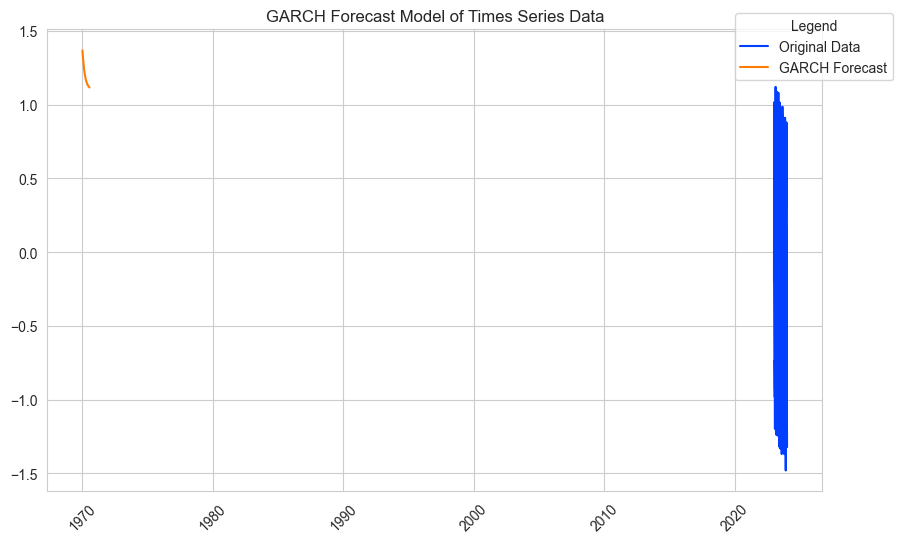

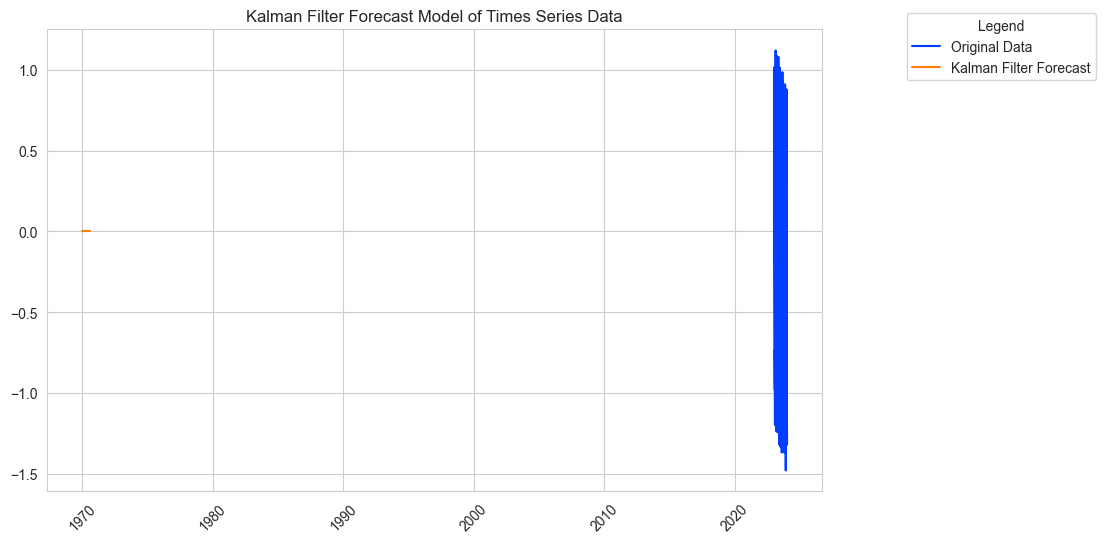

C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 31481081081U will be used.
  self._init_dates(dates, freq)


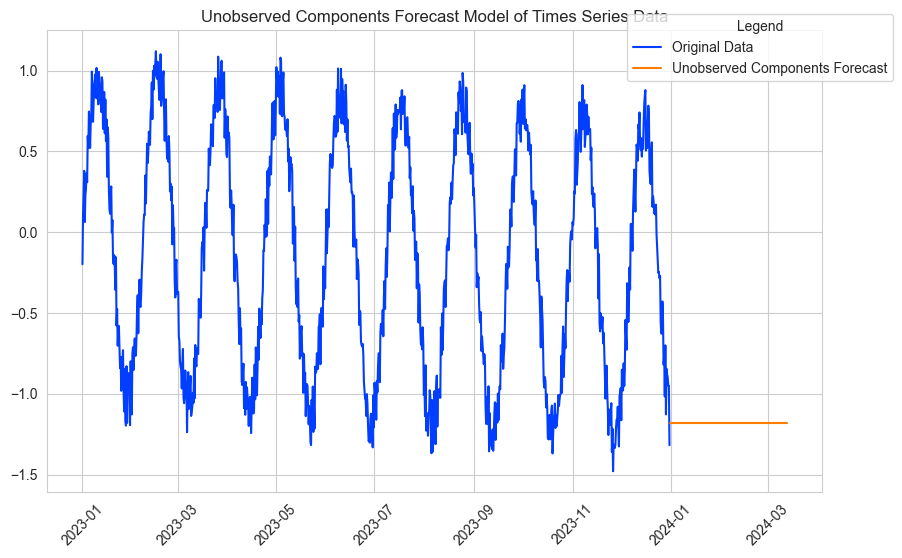

C:\Users\josep\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


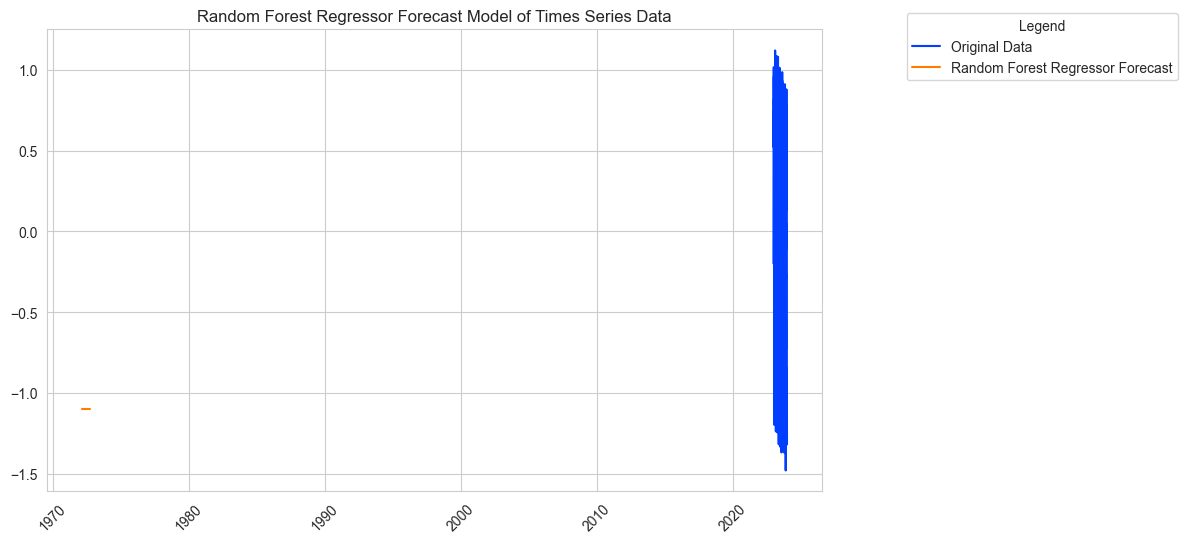

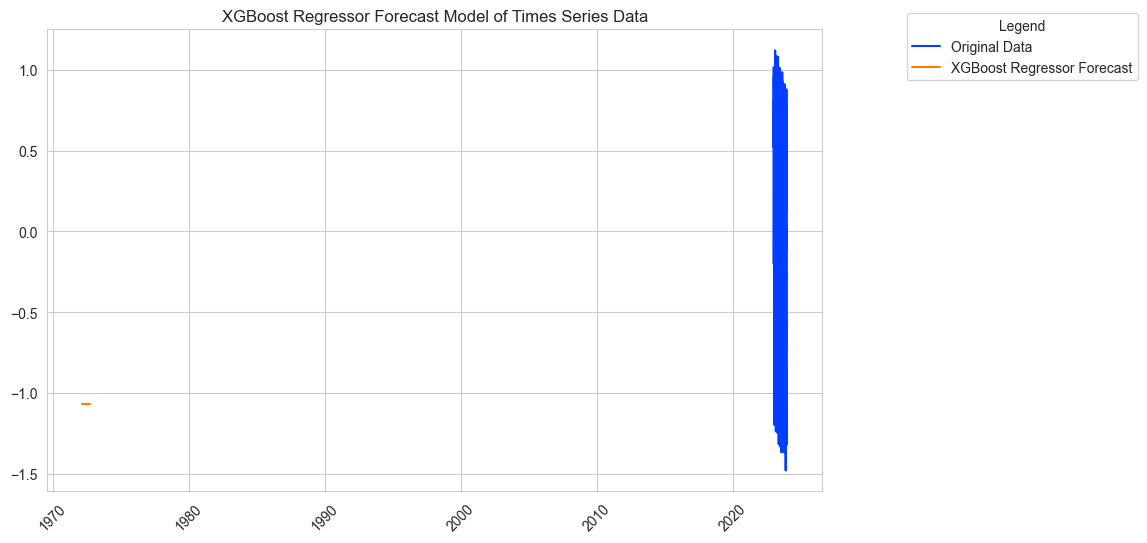

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 1
[LightGBM] [Info] Start training from score -0.106630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

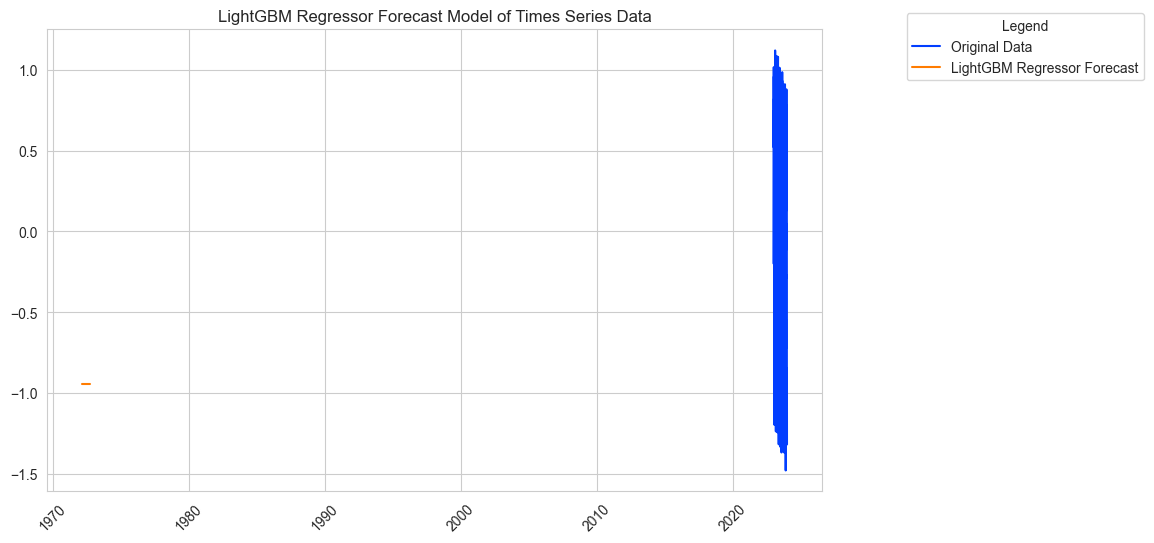

Best performing model: Kalman Filter
RMSE: 0.7342445620435424


('Kalman Filter',
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 0.7342445620435424)

In [10]:
# create an instance of the TimeSeriesModel class
model = TimeSeriesModel(stationary_series)

# call the arima method with default parameters
#model.arima()

# call the sarimax method with custom parameters
#model.sarimax()

# call the holt_winters method with custom parameters
#model.holt_winters(trend='add', seasonal='add', seasonal_periods=12)

# call the stl method with custom parameters
#model.stl()

# call the garch method with custom parameters
#model.garch()

# call the compare_models method to compare all models
model.compare_models()

# call the plot_all_models method to plot all models
#model.plot_all_models()


In [59]:
from tsfresh import extract_features
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh.utilities.dataframe_functions import impute

class FRESHFeatureSelector:
    def __init__(self, time_series_data, target_column):
        self.time_series_data = time_series_data
        self.target_column = target_column
        self.features = None

    def select_features(self):
        # Extract features from time series data
        extracted_features = extract_features(self.time_series_data, column_id='id', column_sort='time')

        # Impute missing values
        imputed_features = impute(extracted_features)

        # Calculate relevance table
        relevance_table = calculate_relevance_table(imputed_features, self.target_column)

        # Select relevant features
        relevant_features = relevance_table[relevance_table.relevant].index.values

        # Store selected features
        self.features = relevant_features

        return relevant_features.columns
